In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Feature Selection

In [4]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
            'households', 'median_income', 'median_house_value', 'ocean_proximity']

data = data[features]

### Data Preparation

In [5]:
# Filling missing values

data.fillna(0, inplace=True)

In [6]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

### Question 1

In [7]:
data['ocean_proximity'].mode()[0]

# The most frequent observation (mode) for the column 'ocean_proximity' is '<1H OCEAN'

'<1H OCEAN'

### Question 2

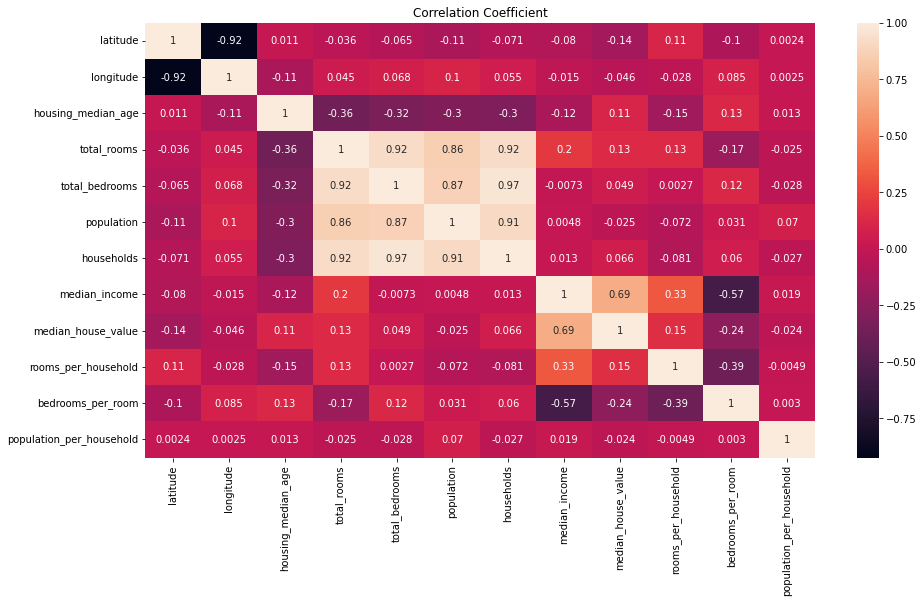

In [8]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Coefficient')
plt.show()


# The features that have the biggest correlation are: 'total_bedrooms and households' and 'total_bedrooms and total_rooms'

#### Making `median_house_value` binary

In [9]:
house_mean = data['median_house_value'].mean()

data['above_average'] = data['median_house_value'].apply(lambda x: 1 if x > house_mean else 0)

#### Splitting the data

In [10]:
from sklearn.model_selection import train_test_split

full_train, test = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
train, val = train_test_split(full_train, test_size=0.25, random_state=42)

In [12]:
len(train), len(val), len(test)

(12384, 4128, 4128)

In [13]:
full_train = full_train.reset_index(drop=True)
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [14]:
y_train = train['above_average']
y_val = val['above_average']
y_test = test['above_average']

In [15]:
# del train['median_house_value']
# del val['median_house_value']
# del test['median_house_value']

# del train['above_average']
# del val['above_average']
# del test['above_average']

### Question 3

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
round(mutual_info_score(train['ocean_proximity'], y_train), 2)

# The mutual information score between the binarized price and the categorical variable ('Ocean Prioximity') is 0.10

0.1

### Question 4

In [18]:
train = pd.get_dummies(train)
val = pd.get_dummies(val)
test = pd.get_dummies(test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [21]:
log_reg.fit(train.drop(['above_average', 'median_house_value'], axis = 1), y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [22]:
val_pred = log_reg.predict(val.drop(['above_average', 'median_house_value'], axis = 1))

In [23]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(val_pred, y_val), 2))

0.84


### Question 6

In [24]:
y_train = np.log1p(train['median_house_value'].values)
y_val = np.log1p(val['median_house_value'].values)
y_test = np.log1p(test['median_house_value'].values)

In [25]:
from sklearn.linear_model import Ridge

In [26]:
from sklearn.metrics import mean_squared_error

rmse = []

for alpha in [0, 0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha, solver="sag", random_state=42)
    ridge.fit(train.drop(['above_average', 'median_house_value'], axis = 1), y_train)
    val_pred = ridge.predict(val.drop(['above_average', 'median_house_value'], axis = 1))
    
    score = np.sqrt(round(mean_squared_error(val_pred, y_val), 3))

    rmse.append(score)

    # The alpha value with the least RMSE is 0

In [27]:
rmse

[0.5244044240850758,
 0.5244044240850758,
 0.5244044240850758,
 0.5244044240850758,
 0.5244044240850758]